<a href="https://colab.research.google.com/github/ValentinoMalakianno/Pembelajaran_Mesin2023/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,874 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os  # Library untuk interaksi dengan sistem operasi
import sys  # Library untuk interaksi dengan sistem operasi
import json  # Library untuk mengelola data JSON
import re  # Library untuk operasi regular expression (regex)
import pytesseract  # Wrapper Python untuk Tesseract OCR
from PIL import Image # Library untuk manipulasi gambar

In [4]:
class KTPInformation(object):
    def __init__(self):
        # Inisialisasi atribut-atribut untuk menyimpan informasi dari KTP
        self.nik = ""
        self.nama = ""
        self.tempat_lahir = ""
        self.tanggal_lahir = ""
        self.jenis_kelamin = ""
        self.golongan_darah = ""
        self.alamat = ""
        self.rt = ""
        self.rw = ""
        self.kelurahan_atau_desa = ""
        self.kecamatan = ""
        self.agama = ""
        self.status_perkawinan = ""
        self.pekerjaan = ""
        self.kewarganegaraan = ""
        self.berlaku_hingga = "SEUMUR HIDUP"

In [10]:
class KTPOCR(object):
    def __init__(self, image):
        # Membaca gambar KTP menggunakan OpenCV
        self.image = cv2.imread(image)
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)  # Mengonversi gambar ke citra keabuan
        self.th, self.threshed = cv2.threshold(self.gray, 127, 255, cv2.THRESH_TRUNC)  # Thresholding citra
        self.result = KTPInformation()  # Membuat instance dari kelas KTPInformation
        self.master_process()  # Memulai proses ekstraksi informasi dari KTP

    # Fungsi untuk melakukan pengolahan citra menggunakan Tesseract OCR
    def process(self, image):
        raw_extracted_text = pytesseract.image_to_string((self.threshed), lang="ind")
        return raw_extracted_text

    # Fungsi konversi huruf ke angka untuk data spesifik (NIK)
    def word_to_number_converter(self, word):
        word_dict = {
            '|' : "1"
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res

    # Fungsi untuk ekstraksi NIK dari hasil ekstraksi teks
    def nik_extract(self, word):
        word_dict = {
            'b' : "6",
            'e' : "2",
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res

    # Fungsi untuk mengekstrak informasi dari hasil teks yang diekstraksi
    def extract(self, extracted_result):
      # Proses pemrosesan teks yang diekstraksi untuk mendapatkan informasi spesifik KTP
        # Proses ini dilakukan dengan mengidentifikasi kata kunci dan pola pada teks hasil ekstraksi
        # dan menyesuaikannya dengan atribut-atribut pada kelas KTPInformation

        # (Kode ini perlu disesuaikan dengan struktur dan format teks yang dihasilkan oleh Tesseract OCR)

        #print(extracted_result.replace('\n', ' -- '))
        for word in extracted_result.split("\n"):
            if "NIK" in word:
                word = word.split(':')
                self.result.nik = self.nik_extract(word[-1].replace(" ", ""))
                continue

            if "Nama" in word:
                word = word.split(':')
                self.result.nama = word[-1].replace('Nama ','')
                continue

            if "Tempat" in word:
                word = word.split(':')
                self.result.tanggal_lahir = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{4})", word[-1])[0]
                self.result.tempat_lahir = word[-1].replace(self.result.tanggal_lahir, '')
                continue

            if 'Darah' in word:
                self.result.jenis_kelamin = re.search("(LAKI-LAKI|LAKI|LELAKI|PEREMPUAN)", word)[0]
                word = word.split(':')
                try:
                    self.result.golongan_darah = re.search("(O|A|B|AB)", word[-1])[0]
                except:
                    self.result.golongan_darah = '-'
            if 'Alamat' in word:
                self.result.alamat = self.word_to_number_converter(word).replace("Alamat ","")
            if 'NO.' in word:
                self.result.alamat = self.result.alamat + ' '+word
            if "Kecamatan" in word:
                self.result.kecamatan = word.split(':')[1].strip()
            if "Desa" in word:
                wrd = word.split()
                desa = []
                for wr in wrd:
                    if not 'desa' in wr.lower():
                        desa.append(wr)
                self.result.kelurahan_atau_desa = ''.join(wr)
            if 'Kewarganegaraan' in word:
                self.result.kewarganegaraan = word.split(':')[1].strip()
            if 'Pekerjaan' in word:
                wrod = word.split()
                pekerjaan = []
                for wr in wrod:
                    if not '-' in wr:
                        pekerjaan.append(wr)
                self.result.pekerjaan = ' '.join(pekerjaan).replace('Pekerjaan', '').strip()
            if 'Agama' in word:
                self.result.agama = word.replace('Agama',"").strip()
            if 'Perkawinan' in word:
                self.result.status_perkawinan = word.split(':')[1]
            if "RT/RW" in word:
                word = word.replace("RT/RW",'')
                self.result.rt = word.split('/')[0].strip()
                self.result.rw = word.split('/')[1].strip()

    # Fungsi utama yang mengawal proses ekstraksi informasi dari KTP
    def master_process(self):
        # Proses utama yang memicu pengolahan teks menggunakan Tesseract OCR dan ekstraksi informasi KTP
        raw_text = self.process(self.image)
        self.extract(raw_text)

    # Fungsi untuk mengonversi hasil ekstraksi informasi KTP ke dalam format JSON
    def to_json(self):
        return json.dumps(self.result.__dict__, indent=4)


Processing image: KTP_Valentino.jpeg


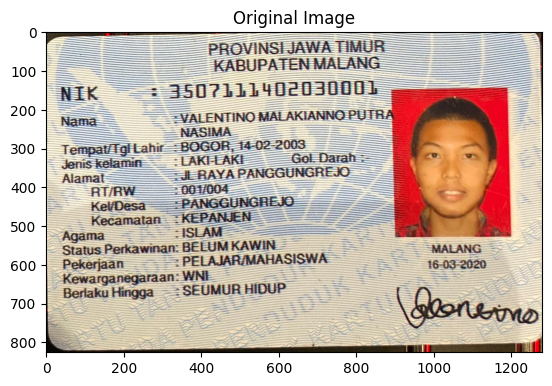

pa 5 nia en EN TA —
5 PROVINSI JAWA TIMUR

   

aan

KABUPATEN MALANG
NIK : 35071114102030905
Nama »YALENTINO MALAKIANNO PUTRA
NAS!IMA
Tempat'igiLahir : BOGOR, 14-02-2003
Jenis kejamun - LAKI-LAKI Got Darah -
Alamat 5 J- RAYA PANGGUNGREJO
RT/RW 1 G0 17004

KeliDesa —PANGGUNGREJO -
Kecamatan : KEPANJEN

Agama : ISLAM SA £
Status Perkawinan: BELUM KAWIN Pat
Pekerjaan PELAJAR/MAHASISWA ' Sa

Kewarganegaraan: - WNI Sa aan

Berlaku Hingga — : SEUMUR HIDUP
Aa nee


Processing image: KTP_FarhanR.jpeg


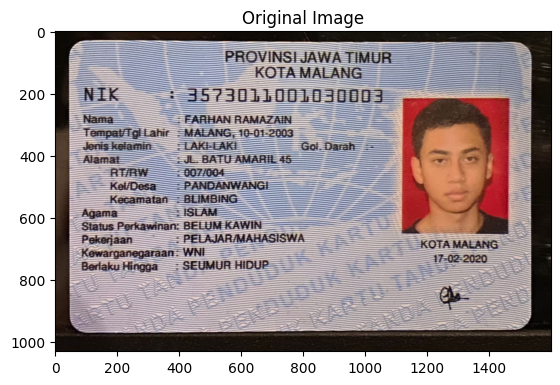

PROVINSI JAWA TIMUR
KOTA MALANG

NIK : 3573011991936983- -gs3

Nama 1 FABRHAN RAMAZAIN
Tempat'Tgilahir : MALANG, 10-01-2003
Jenis kelamin LAKEAKI Goi. Darah -
Alamat . BATU AMARI 25

RR 1 9077004

Kel/Desa -—- PANDANWANGI

Kecamatan — BLIMBING
Agama 1 ISLAM

Status Perkawinan: BELUM KAWIN :
Pekerjaan : PELAJAR/MAHASISWA KOTA MALANG

Kewarganegaraan: WNI 5
Berlaku Hingga: SEUMUR HIDUP Ta

 


Processing image: KTP_BagasR.jpeg


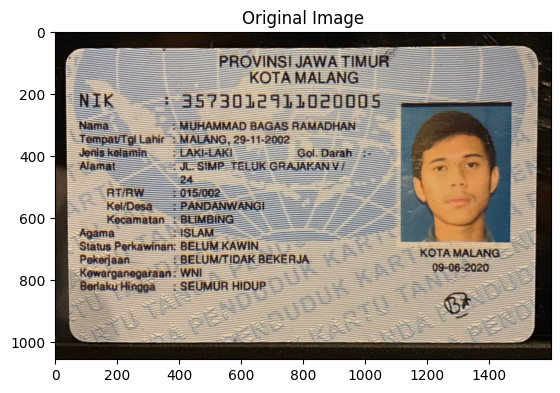

PROVINS! JAWA TIMUR
KOTA MALANG

NIK 35730121411020055 ——-mmmmgn

Nama MUHAMMAD BAGAS RAMADHAN
TempatTg! Lahir - MAKANG, 29-11-2082
Fi HAKEEAKI Gol. Darah
5 JL. SMP TELUK GRAJAKANY

Status Perkawinan: BELUM KAWIN
Pekerjaan #BELUM/TIDAK BEKERJA
Kewarganegaraan: WNI

Berlaku Hingga — : SEUMUR HIDUP

KOTA MALANG
09-06-2020

 


Processing image: KTP_Ilham.jpeg


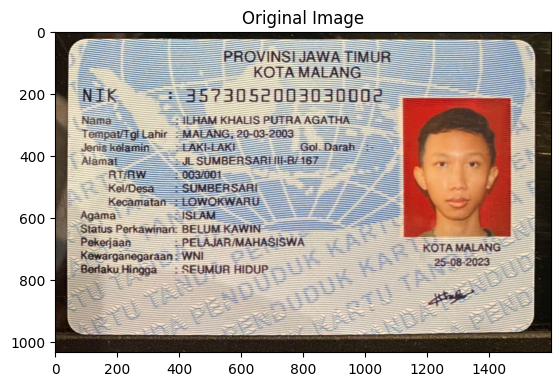

PROVINSI JAWA TIMUR
KOTA MALANG

35730520193939902

: #EHAM KHALIS PUTRA AGATHA
atgitahir : MALANG, 29-03-2003

jenis kelamun AKI LAKI Gol Barah --
mat 2 JL SUMBERSAR1 11-87 187

RTRW 2 9037501

Kel/Desa -SUMBERSARI

Kecamatan -— 190 WOKWARY
Agama : ISEAM
Status Perkawinan: BELUM KAWIN
Pekerjaan : PELAJAR/MAHASISWA KOTA MALANG
Kewarganegaraan: WNI Eng

1 25-08-2023

Berlaku Hingga SEUMUR HIDUP

 



In [15]:
class KTPOCR:
    def __init__(self, image_folder):
        self.image_folder = image_folder  # Inisialisasi folder gambar

    # Fungsi untuk memproses gambar menggunakan Tesseract OCR
    def process_image(self, image_path):
        img = cv2.imread(image_path)  # Membaca gambar dari path
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Mengubah gambar ke citra keabuan

        ## (2) Threshold
        th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)  # Thresholding citra

        ## (3) Detect
        result = pytesseract.image_to_string(threshed, lang="ind")  # Mendeteksi teks pada citra menggunakan Tesseract OCR

        final = []

        ## (5) Normalize
        for word in result.split("\n"):
            if "”—" in word:
                word = word.replace("”—", ":")  # Mengganti karakter khusus menjadi tanda titik dua (:)

            # Normalisasi NIK
            if "NIK" in word:
                nik_char = word.split()
            if "?" in word:
                word = word.replace("?", "7")  # Mengganti karakter tanda tanya (?) menjadi angka 7

            final.append(word)

        return final, img  # Mengembalikan hasil ekstraksi teks dan gambar

    # Fungsi untuk menampilkan informasi dari setiap gambar dalam folder
    def display_info(self):
        for filename in os.listdir(self.image_folder):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(self.image_folder, filename)  # Path menuju gambar
                print(f"\nProcessing image: {filename}")
                extracted_data, image = self.process_image(image_path)  # Proses ekstraksi teks dan gambar

                # Menampilkan gambar asli
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')
                plt.show()

                # Menampilkan data yang diekstraksi
                for item in extracted_data:
                    print(item)

if __name__ == "__main__":
    try:
        image_folder = '/content/drive/MyDrive/Dataset KTP'
    except:
        image_folder = None
        print('Define your image folder path. Example: python ocr.py /path/of/image/folder')
    if image_folder:
        ocr = KTPOCR(image_folder)  # Membuat instance KTPOCR dengan folder gambar yang ditentukan
        ocr.display_info()  # Menampilkan informasi yang diekstraksi dari gambar dalam folder